<a href="https://colab.research.google.com/github/juanalistapablo/Redes_Neurais_2025/blob/main/Analise_de_Sobrevivente_do_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

### Importando bibliotecas

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mticker
from scipy import stats
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report

from sklearn.ensemble import GradientBoostingClassifier

plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure(figsize=(18,6), dpi=1600)
alpha=alpha_scatterplot = 0.2
alpha_bar_chart = 0.55
a = 0.65

<Figure size 28800x9600 with 0 Axes>

### Importando database

In [ ]:
df = pd.read_csv("titanic-data.csv")
df.head(51)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Dimensão

In [ ]:
df.shape

(891, 12)

Base de dados relativamente pequena

### Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Describe

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
import plotly.express as px

# Supondo que o DataFrame seja chamado df
fig = px.bar(df, x=df['Pclass'].value_counts().index, y=df['Pclass'].value_counts().values,
             labels={'x': 'Pclass', 'y': 'Contagem'},
             title='Distribuição de Pclass')

fig.show()


### Histogramas

In [ ]:
import plotly.express as px
import pandas as pd

# Para cada coluna no DataFrame, gerar histogramas e gráficos de densidade (KDE)
for column in df.columns:
    if column in ['Column', 'PassengerId', 'Ticket', 'Sex', 'Cabin', 'Name', 'Embarked', 'Age', 'Fare']:
        continue

    # Criação de histograma com Plotly
    fig = px.histogram(df, x=column, nbins=20, marginal="box", histnorm='density', title=f'Histograma de {column}')
    fig.update_traces(marker=dict(color='lightblue', line=dict(color='black', width=1)))

    # Adicionando gráfico KDE ao histograma
    fig.update_layout(
        title=f'Histograma e KDE de {column}',
        xaxis_title=column,
        yaxis_title='Densidade'
    )

    fig.show()


### Unicidade

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [ ]:
print(f"Total de valores únicos :")
for column in df:
    print(f"")
    print(f"{column} : {df[column].unique().shape[0]}")
    if (column == "PassengerId"):
        pass
    elif (column == "Name"):
        pass
    elif (column == "Age"):
        pass
    elif (column == "Ticket"):
        pass
    elif (column == "Fare"):
        pass
    elif (column == "Cabin"):
        pass
    else:
        print(f"Valores:{df[column].unique()}")

Total de valores únicos :

PassengerId : 891

Survived : 2
Valores:[0 1]

Pclass : 3
Valores:[3 1 2]

Name : 891

Sex : 2
Valores:['male' 'female']

Age : 89

SibSp : 7
Valores:[1 0 3 4 2 5 8]

Parch : 7
Valores:[0 1 2 5 3 4 6]

Ticket : 681

Fare : 248

Cabin : 148

Embarked : 4
Valores:['S' 'C' 'Q' nan]


### Completude

In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


#### Densidade

In [ ]:
import plotly.graph_objects as go

# Calculando os dados válidos e nulos
tam = len(df)
dados_validos = [tam - df[column].isna().sum() for column in df]
dados_nulos = [df[column].isna().sum() for column in df]

# Criando o gráfico de barras empilhadas
fig = go.Figure()

# Adicionando os dados válidos
fig.add_trace(go.Bar(
    x=df.columns.tolist(),
    y=dados_validos,
    name='Dados válidos',
    marker=dict(color='blue')
))

# Adicionando os dados nulos
fig.add_trace(go.Bar(
    x=df.columns.tolist(),
    y=dados_nulos,
    name='Dados nulos',
    marker=dict(color='red')
))

# Atualizando o layout do gráfico
fig.update_layout(
    title='Densidade de Dados Válidos e Nulos',
    barmode='stack',
    xaxis_title='Colunas',
    yaxis_title='Contagem',
    legend_title="Tipo de Dado"
)

# Exibindo o gráfico
fig.show()


In [ ]:
tam = len(df)
for column in df:
    nulos = df[column].isna().sum()
    x = 1 - nulos/tam
    print("Dados validos de", column, ":", x*100, "%" )

Dados validos de PassengerId : 100.0 %
Dados validos de Survived : 100.0 %
Dados validos de Pclass : 100.0 %
Dados validos de Name : 100.0 %
Dados validos de Sex : 100.0 %
Dados validos de Age : 80.13468013468014 %
Dados validos de SibSp : 100.0 %
Dados validos de Parch : 100.0 %
Dados validos de Ticket : 100.0 %
Dados validos de Fare : 100.0 %
Dados validos de Cabin : 22.895622895622893 %
Dados validos de Embarked : 99.77553310886644 %


#### Cobertura

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Criando gráficos de barras para as distribuições das colunas
for column in df.columns:
    if column in ['Column', 'PassengerId', 'Ticket', 'Months', 'Cabin', 'Age', 'Fare', 'Name']:
        continue

    # Calculando a distribuição de valores
    item_counts = df[column].value_counts()
    item_counts_dict = dict(item_counts)

    # Criando o gráfico de barras
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=list(item_counts_dict.keys()),
        y=list(item_counts_dict.values()),
        name=column,
        marker=dict(color='blue')
    ))

    # Atualizando o layout do gráfico
    fig.update_layout(
        title=f'Distribuição de {column}',
        xaxis_title=column,
        yaxis_title='Contagem',
        xaxis=dict(tickmode='array', tickvals=list(item_counts_dict.keys())),
        legend_title='Tipo de Distribuição'
    )

    # Exibindo o gráfico
    fig.show()


### Limpeza e Transformação
- remoção do PassengerId
- remoção da informação Cabin que possuía baixa completude (abaixo de 70%)
- transformação da feature categórica: Sex, em feature numérica: Gender (0|1)

In [ ]:
df_1 = pd.get_dummies(df["Sex"])
df_2 = pd.concat((df_1, df), axis=1)
df_2 = df_2.drop(["Sex","PassengerId","Cabin", "male"], axis=1)
df_3 = df_2.rename(columns={"female": "Gender"})
df_3.head()

,Gender,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S
1,True,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C
2,True,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S
3,True,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S
4,False,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S


### Lidando com Missing Data
- adicionando a idade para valores faltantes por meio de Mediana por Categoria (Pclass ou Gender) (utilizando valores existentes)

In [ ]:
df_3["Embarked"].fillna("S", inplace =True)

# Preenchendo os valores nulos de "Age" com a mediana de "Age" dentro de cada "Pclass"
df_3['Age'] = df_3.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

# Verificar se ainda há valores nulos
df_3.info()
df_3.head(50)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gender    891 non-null    bool   
 1   Survived  891 non-null    int64  
 2   Pclass    891 non-null    int64  
 3   Name      891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Months    891 non-null    float64
 11  Adult     891 non-null    int64  
dtypes: bool(1), float64(3), int64(5), object(3)
memory usage: 77.6+ KB


/tmp/ipython-input-61-2126766393.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Gender,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Months,Adult
0,False,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,264.0,1
1,True,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,456.0,1
2,True,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,312.0,1
3,True,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,420.0,1
4,False,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,420.0,1
5,False,0,3,"Moran, Mr. James",35.0,0,0,330877,8.4583,Q,420.0,1
6,False,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,S,648.0,1
7,False,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,S,24.0,0
8,True,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,S,324.0,1
9,True,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,C,168.0,1


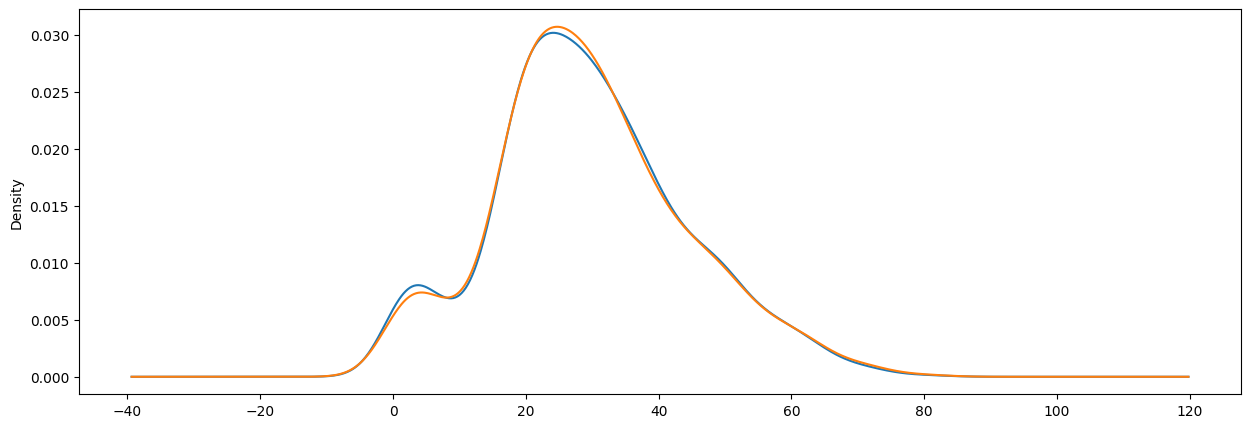

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

# Histograma e KDE para o DataFrame df_3
fig_3 = go.Figure()

# Histograma para "Age" no df_3
fig_3.add_trace(go.Histogram(
    x=df_3['Age'],
    nbinsx=20,
    histnorm='density',
    name='Histograma Pós-Processamento',
    marker=dict(color='lightblue', line=dict(color='black', width=1))
))

# KDE para "Age" no df_3
fig_3.add_trace(go.Scatter(
    x=sorted(df_3['Age'].dropna()),
    y=df_3['Age'].dropna().plot.kde().get_lines()[0].get_ydata(),
    mode='lines',
    name='KDE Pós-Processamento',
    line=dict(color='red')
))

fig_3.update_layout(
    title='Histograma e KDE: Idade Pós-Processamento',
    xaxis_title='Idade',
    yaxis_title='Densidade',
    showlegend=True
)

fig_3.show()

# Histograma e KDE para o DataFrame df
fig = go.Figure()

# Histograma para "Age" no df
fig.add_trace(go.Histogram(
    x=df['Age'],
    nbinsx=20,
    histnorm='density',
    name='Histograma Pré-Processamento',
    marker=dict(color='lightblue', line=dict(color='black', width=1))
))

# KDE para "Age" no df
fig.add_trace(go.Scatter(
    x=sorted(df['Age'].dropna()),
    y=df['Age'].dropna().plot.kde().get_lines()[0].get_ydata(),
    mode='lines',
    name='KDE Pré-Processamento',
    line=dict(color='red')
))

fig.update_layout(
    title='Histograma e KDE: Idade Pré-Processamento',
    xaxis_title='Idade',
    yaxis_title='Densidade',
    showlegend=True
)

fig.show()


### Engenharia de Dados
- separação da idade para adição da coluna meses
- diferenciação entre criança e adulto, utilizando relação entre o Título presente no nome (Miss e Master) e a Idade

In [ ]:
months = []
for index, row in df_3.iterrows():
    months.append(row['Age']*12)

df_3['Months'] = months

adults = []
for index, row in df_3.iterrows():
    name = str(row['Name'])
    if(("Miss." in name) & (row['Age'] < 18)):
        adults.append(0)
    elif(("Master" in name) & (row['Age'] < 18)):
        adults.append(0)
    else:
        adults.append(1)

df_3['Adult'] = adults
df_3.info()
df_3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gender    891 non-null    bool   
 1   Survived  891 non-null    int64  
 2   Pclass    891 non-null    int64  
 3   Name      891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Months    891 non-null    float64
 11  Adult     891 non-null    int64  
dtypes: bool(1), float64(3), int64(5), object(3)
memory usage: 77.6+ KB


,Gender,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Months,Adult
0,False,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,264.0,1
1,True,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,456.0,1
2,True,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,312.0,1
3,True,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,420.0,1
4,False,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,420.0,1


#### Percebe-se que os métodos para preencher Missing  Values foram efetivos, pois, as estatísticas que envolvem a Idade foram minimamente alteradas

In [ ]:
df_3.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Months,Adult
count,891.000000,891.000000,891.00000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.58156,0.523008,0.381594,32.204208,354.978721,0.897868
std,0.486592,0.836071,14.55459,1.102743,0.806057,49.693429,174.655078,0.302992
min,0.000000,1.000000,0.42000,0.000000,0.000000,0.000000,5.040000,0.000000
25%,0.000000,2.000000,20.00000,0.000000,0.000000,7.910400,240.000000,1.000000
50%,0.000000,3.000000,28.00000,0.000000,0.000000,14.454200,336.000000,1.000000
75%,1.000000,3.000000,38.00000,1.000000,0.000000,31.000000,456.000000,1.000000
max,1.000000,3.000000,80.00000,8.000000,6.000000,512.329200,960.000000,1.000000


#### Remoção da coluna Idade, pois é uma informação "duplicada" com Meses

Text(0.5, 1.0, 'Correlação entre Variáveis Numéricas')

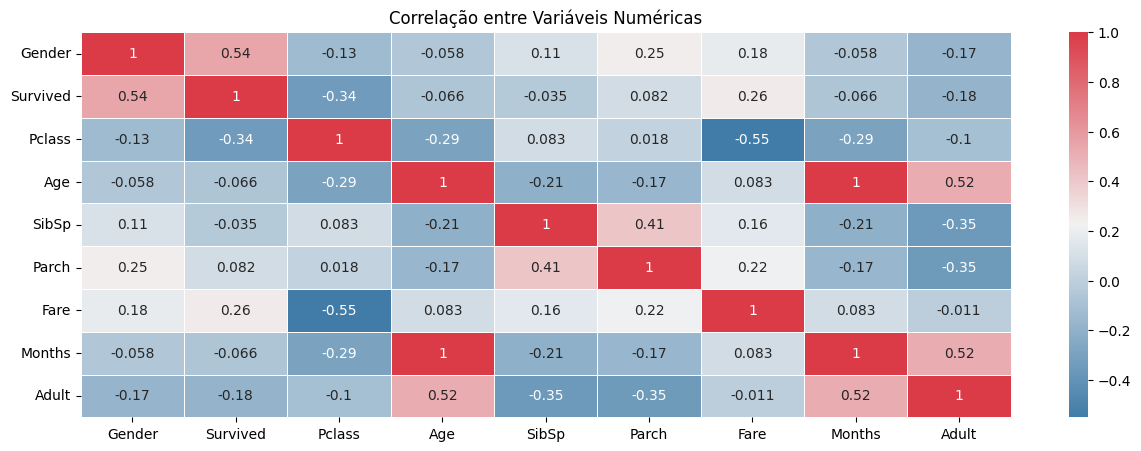

In [ ]:
df_corr = df_3.drop(['Name', 'Ticket', 'Embarked'], axis=1)
corr = df_corr.corr()

cmap = sns.diverging_palette(600, 10, as_cmap = True)
sns.heatmap(corr, cmap=cmap, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidth=.5)
plt.title("Correlação entre Variáveis Numéricas")

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Criando o gráfico de dispersão (scatter plot)
fig = go.Figure()

# Adicionando os dados de "Survived" e "Months"
fig.add_trace(go.Scatter(
    x=df_3['Survived'],
    y=df_3['Months'],
    mode='markers',
    marker=dict(opacity=0.7, color='blue'),  # Transparência e cor dos pontos
    name="Sobreviventes por Idade"
))

# Atualizando o layout
fig.update_layout(
    title="Sobreviventes por Idade, (1 = Sobreviveu)",
    xaxis_title="Sobreviveu (1 = Sim, 0 = Não)",
    yaxis_title="Meses de Vida",
    showlegend=False,
    xaxis=dict(tickvals=[0, 1], ticktext=["Não", "Sim"]),
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    template='plotly_white'  # Templo gráfico limpo
)

# Exibindo o gráfico
fig.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np

# Filtrando os dados por Pclass
pclass_1 = df_3[df_3['Pclass'] == 1]['Months']
pclass_2 = df_3[df_3['Pclass'] == 2]['Months']
pclass_3 = df_3[df_3['Pclass'] == 3]['Months']

# Criando o gráfico de KDE
fig = go.Figure()

# Adicionando a distribuição KDE para cada classe
fig.add_trace(go.Histogram(
    x=pclass_1,
    histnorm='density',
    name="1° Classe",
    opacity=0.6,
    nbinsx=20,
    marker=dict(color='blue'),
    showlegend=True
))

fig.add_trace(go.Histogram(
    x=pclass_2,
    histnorm='density',
    name="2° Classe",
    opacity=0.6,
    nbinsx=20,
    marker=dict(color='green'),
    showlegend=True
))

fig.add_trace(go.Histogram(
    x=pclass_3,
    histnorm='density',
    name="3° Classe",
    opacity=0.6,
    nbinsx=20,
    marker=dict(color='red'),
    showlegend=True
))

# Atualizando o layout do gráfico
fig.update_layout(
    title="Distribuição de Idade por Classes",
    xaxis_title="Meses de Vida",
    yaxis_title="Densidade",
    barmode='overlay',  # Para sobrepor as distribuições
    template="plotly_white",
    legend_title="Classes",
    showlegend=True
)

fig.show()


In [ ]:
import plotly.graph_objects as go

# Contagem de sobreviventes
survived_counts = df_3['Survived'].value_counts()

# Criando o gráfico de barras
fig = go.Figure()

# Adicionando a contagem de sobreviventes
fig.add_trace(go.Bar(
    x=survived_counts.index,
    y=survived_counts.values,
    marker=dict(color='blue', opacity=0.7),
    name="Sobreviventes",
))

# Atualizando o layout do gráfico
fig.update_layout(
    title="Quantos Sobreviveram?",
    xaxis_title="Sobreviveu (0 = Não, 1 = Sim)",
    yaxis_title="Contagem",
    xaxis=dict(tickvals=[0, 1], ticktext=["Não", "Sim"]),
    showlegend=True,
    template="plotly_white"  # Estilo limpo
)

# Exibindo o gráfico
fig.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Contagem de sobreviventes por gênero
survived_men = df_3.Survived[df_3.Gender == 0].value_counts()
survived_women = df_3.Survived[df_3.Gender == 1].value_counts()

# Criando o gráfico
fig = go.Figure()

# Adicionando a contagem de sobreviventes homens
fig.add_trace(go.Bar(
    x=survived_men.index,
    y=survived_men.values,
    name="Homem",
    marker=dict(color='blue'),
))

# Adicionando a contagem de sobreviventes mulheres
fig.add_trace(go.Bar(
    x=survived_women.index,
    y=survived_women.values,
    name="Mulher",
    marker=dict(color='#FA2379'),
))

# Atualizando o layout
fig.update_layout(
    title="Quem Sobreviveu? Em Relação ao Gênero",
    xaxis_title="Sobreviveu (0 = Não, 1 = Sim)",
    yaxis_title="Contagem",
    xaxis=dict(tickvals=[0, 1], ticktext=["Não", "Sim"]),
    barmode='group',  # Agrupar as barras
    showlegend=True,
    template="plotly_white"  # Estilo limpo
)

# Exibindo o gráfico
fig.show()

In [ ]:
import plotly.graph_objects as go

# Calculando a proporção de sobreviventes por gênero
survived_men_proportion = df_3.Survived[df_3.Gender == 0].value_counts() / float(df_3.Gender[df_3.Gender == 0].size)
survived_women_proportion = df_3.Survived[df_3.Gender == 1].value_counts() / float(df_3.Gender[df_3.Gender == 1].size)

# Criando o gráfico
fig = go.Figure()

# Adicionando a proporção de sobreviventes homens
fig.add_trace(go.Bar(
    x=survived_men_proportion.index,
    y=survived_men_proportion.values,
    name="Homem",
    marker=dict(color='blue'),
))

# Adicionando a proporção de sobreviventes mulheres
fig.add_trace(go.Bar(
    x=survived_women_proportion.index,
    y=survived_women_proportion.values,
    name="Mulher",
    marker=dict(color='#FA2379'),
))

# Atualizando o layout
fig.update_layout(
    title="Quem Sobreviveu, Proporcionalmente?",
    xaxis_title="Sobreviveu (0 = Não, 1 = Sim)",
    yaxis_title="Proporção",
    xaxis=dict(tickvals=[0, 1], ticktext=["Não", "Sim"]),
    barmode='group',  # Agrupar as barras
    showlegend=True,
    template="plotly_white"  # Estilo limpo
)

# Exibindo o gráfico
fig.show()


In [ ]:
import plotly.graph_objects as go

# Filtrando mulheres de classe alta (não classe 3)
female_highclass = df_3.Survived[(df_3.Gender == 1) & (df_3.Pclass != 3)].value_counts()

# Criando o gráfico
fig = go.Figure()

# Adicionando a contagem de sobreviventes para mulheres classe alta
fig.add_trace(go.Bar(
    x=female_highclass.index,
    y=female_highclass.values,
    name="Mulher Classe Alta",
    marker=dict(color='#FA2479', opacity=0.7),
))

# Atualizando o layout
fig.update_layout(
    title="Quem Sobreviveu? Em Relação ao Gênero e Classe",
    xaxis_title="Sobreviveu (0 = Não, 1 = Sim)",
    yaxis_title="Contagem",
    xaxis=dict(tickvals=[0, 1], ticktext=["Died", "Survived"]),
    showlegend=True,
    template="plotly_white"  # Estilo limpo
)

# Exibindo o gráfico
fig.show()


In [ ]:
import plotly.graph_objects as go

# Filtrando mulheres da classe baixa (classe 3)
female_lowclass = df_3.Survived[(df_3.Gender == 1) & (df_3.Pclass == 3)].value_counts()

# Criando o gráfico
fig = go.Figure()

# Adicionando a contagem de sobreviventes para mulheres classe baixa
fig.add_trace(go.Bar(
    x=female_lowclass.index,
    y=female_lowclass.values,
    name="Mulher Classe Baixa",
    marker=dict(color='pink', opacity=0.7),
))

# Atualizando o layout
fig.update_layout(
    title="Quem Sobreviveu? Em Relação ao Gênero e Classe",
    xaxis_title="Sobreviveu (0 = Não, 1 = Sim)",
    yaxis_title="Contagem",
    xaxis=dict(tickvals=[0, 1], ticktext=["Died", "Survived"]),
    showlegend=True,
    template="plotly_white"  # Estilo limpo
)

# Exibindo o gráfico
fig.show()


In [ ]:
import plotly.graph_objects as go

# Filtrando homens de classe baixa (classe 3)
male_lowclass = df_3.Survived[(df_3.Gender == 0) & (df_3.Pclass == 3)].value_counts()

# Filtrando homens de classe alta (não classe 3)
male_highclass = df_3.Survived[(df_3.Gender == 0) & (df_3.Pclass != 3)].value_counts()

# Criando o gráfico
fig = go.Figure()

# Adicionando a contagem de sobreviventes para homens classe baixa
fig.add_trace(go.Bar(
    x=male_lowclass.index,
    y=male_lowclass.values,
    name="Homem Classe Baixa",
    marker=dict(color='lightblue', opacity=0.7),
))

# Adicionando a contagem de sobreviventes para homens classe alta
fig.add_trace(go.Bar(
    x=male_highclass.index,
    y=male_highclass.values,
    name="Homem Classe Alta",
    marker=dict(color='steelblue', opacity=0.7),
))

# Atualizando o layout
fig.update_layout(
    title="Quem Sobreviveu? Em Relação ao Gênero e Classe",
    xaxis_title="Sobreviveu (0 = Não, 1 = Sim)",
    yaxis_title="Contagem",
    xaxis=dict(tickvals=[0, 1], ticktext=["Died", "Survived"]),
    barmode='group',  # Agrupar as barras
    showlegend=True,
    template="plotly_white"  # Estilo limpo
)

# Exibindo o gráfico
fig.show()


In [ ]:
import plotly.graph_objects as go

# Proporção de sobreviventes para adultos (Adult == 1)
adult_survived_proportion = df_3.Survived[df_3.Adult == 1].value_counts() / float(df_3.Adult[df_3.Adult == 1].size)

# Proporção de sobreviventes para crianças (Adult == 0)
child_survived_proportion = df_3.Survived[df_3.Adult == 0].value_counts() / float(df_3.Adult[df_3.Adult == 0].size)

# Criando o gráfico
fig = go.Figure()

# Adicionando a proporção de sobreviventes para adultos
fig.add_trace(go.Bar(
    x=adult_survived_proportion.index,
    y=adult_survived_proportion.values,
    name="Adulto",
    marker=dict(color='blue', opacity=0.7),
))

# Adicionando a proporção de sobreviventes para crianças
fig.add_trace(go.Bar(
    x=child_survived_proportion.index,
    y=child_survived_proportion.values,
    name="Criança",
    marker=dict(color='orange', opacity=0.7),
))

# Atualizando o layout
fig.update_layout(
    title="Quem Sobreviveu, Proporcionalmente?",
    xaxis_title="Sobreviveu (0 = Não, 1 = Sim)",
    yaxis_title="Proporção",
    xaxis=dict(tickvals=[0, 1], ticktext=["Died", "Survived"]),
    barmode='group',  # Agrupar as barras
    showlegend=True,
    template="plotly_white"  # Estilo limpo
)

# Exibindo o gráfico
fig.show()


In [ ]:
import plotly.graph_objects as go

# Dados para a porcentagem de pessoas por classe
pclass_data = [df_3['Pclass'].value_counts()[1], df_3['Pclass'].value_counts()[2], df_3['Pclass'].value_counts()[3]]
pclass_labels = ['Primeira Classe', 'Segunda Classe', 'Terceira Classe']
pclass_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Usando cores diferentes para as classes

# Dados para a porcentagem de passageiros por maturidade (Adulto ou Criança)
adult_data = [df_3['Adult'].value_counts()[1], df_3['Adult'].value_counts()[0]]
adult_labels = ['Adulto', 'Criança']
adult_colors = ['#d62728', '#9467bd']  # Usando cores diferentes para Adulto e Criança

# Criando o gráfico de pizza para a porcentagem de pessoas por classe
fig = go.Figure()

# Adicionando o gráfico de pizza para a classe (no canto esquerdo)
fig.add_trace(go.Pie(
    labels=pclass_labels,
    values=pclass_data,
    marker=dict(colors=pclass_colors),
    name='Porcentagem de pessoas por classe',
    hoverinfo='label+percent',
    textinfo='percent',
    domain=dict(x=[0, 0.45])  # Posicionando o gráfico à esquerda
))

# Adicionando o gráfico de pizza para a maturidade (no canto direito)
fig.add_trace(go.Pie(
    labels=adult_labels,
    values=adult_data,
    marker=dict(colors=adult_colors),
    name='Porcentagem de passageiros por maturidade',
    hoverinfo='label+percent',
    textinfo='percent',
    domain=dict(x=[0.55, 1])  # Posicionando o gráfico à direita
))

# Atualizando o layout
fig.update_layout(
    title="Distribuição de Passageiros",
    title_x=0.5,  # Centralizando o título
    showlegend=True,
    template="plotly_white"
)

# Exibindo o gráfico
fig.show()


# MODELON DE CLASSIFICÃO MLP

Graças a EDA podemos percerber que:

- temos uma base pequena e com seu exemplos bastante debaliciados entre as classes. Logo a `Validação Cruzada` e um otimo recurso para fugir do perigo da aleatoriedade no treinamento.
- tabem ficou clara a nao linearidade dos problema , justificando a escolha da arquitetura ` MLP`.
- regularização L2 , maior controle de pessos entre as camdas.
- e fuções adequadas para uma arquitetura de rede neurais para um problema de classificação.
- separação do conjunto : 80/20 (treino, validação).



##### Selecionando melhor KFold

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Preparação dos dados
y_train = df_3["Survived"]
df_4 = df_3.drop(['Survived', 'Name', 'Ticket', 'Embarked'], axis=1)

X_train = df_4.values[0:891]
X_test = df_4.values[0:891]

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

test_size = 0.20
seed = 12

# Divisão em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
    test_size=test_size, random_state=seed)

# Inicializando o KFold para Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

# Definindo o modelo
modelo = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(2, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
])

# Definindo a função de perda, otimizador e métricas
modelo.compile(loss='categorical_crossentropy',
               optimizer='rmsprop',
               metrics=['categorical_accuracy', 'Precision', 'Recall'])

# Convertendo os rótulos para formato categórico
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_val_categorical = tf.keras.utils.to_categorical(y_val, num_classes=2)

# Inicializando listas para salvar os resultados de cada dobra
classification_reports = []

# Realizando Cross-Validation
for train_index, val_index in kf.split(X_train):
    # Dividindo os dados em treino e validação para cada dobra
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train_categorical[train_index], y_train_categorical[val_index]

    # Treinando o modelo na dobra
    modelo.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, validation_data=(X_val_fold, y_val_fold), verbose=0)

    # Fazendo predições para a dobra de validação
    y_pred = modelo.predict(X_val_fold)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Gerando e armazenando o classification report para a dobra
    report = classification_report(np.argmax(y_val_fold, axis=1), y_pred_classes)
    classification_reports.append(report)

# Imprimindo os resultados de cada dobra
for i, report in enumerate(classification_reports):
    print(f"Classification Report for Fold {i+1}:\n", report)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Classification Report for Fold 1:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84        88
           1       0.76      0.69      0.72        55

    accuracy                           0.80       143
   macro avg       0.79      0.78      0.78       143
weighted avg       0.80      0.80      0.80       143

Classification Report for Fold 2:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92        96
           1       0.84      0.81      0.83        47

    accuracy                           0.89       143
   macro avg       0.88      0.87      0.87       143
weighted avg       0.89      0.89      0.89       143

Classification Report for Fold 3:
               precision    recall  f1-score   suppo

##### Selecionado L2

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Preparação dos dados
y_train = df_3["Survived"]
df_4 = df_3.drop(['Survived', 'Name', 'Ticket', 'Embarked'], axis=1)

X_train = df_4.values[0:891]
X_test = df_4.values[0:891]

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

test_size = 0.20
seed = 12

# Divisão em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
    test_size=test_size, random_state=seed)

# Inicializando o KFold para Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

# Definindo o modelo
modelo = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(2, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
])

# Definindo a função de perda, otimizador e métricas
modelo.compile(loss='categorical_crossentropy',
               optimizer='rmsprop',
               metrics=['categorical_accuracy', 'Precision', 'Recall'])

# Convertendo os rótulos para formato categórico
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_val_categorical = tf.keras.utils.to_categorical(y_val, num_classes=2)

# Realizando Cross-Validation
for fold_idx, (train_index, val_index) in enumerate(kf.split(X_train)):
    # Dividindo os dados em treino e validação para cada dobra
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train_categorical[train_index], y_train_categorical[val_index]

    # Treinando o modelo na dobra
    modelo.fit(X_train_fold, y_train_fold, epochs=60, batch_size=32, validation_data=(X_val_fold, y_val_fold), verbose=0)

    # Fazendo predições para a dobra de validação
    y_pred = modelo.predict(X_val_fold)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Gerando o classification report para a dobra
    report = classification_report(np.argmax(y_val_fold, axis=1), y_pred_classes)

    # Fixando e imprimindo o classification report da dobra 2
    if fold_idx == 1:  # Lembrando que o índice começa do 0
        print(f"Classification Report for Fold 2:\n{report}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Classification Report for Fold 2:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        96
           1       0.92      0.74      0.82        47

    accuracy                           0.90       143
   macro avg       0.90      0.86      0.87       143
weighted avg       0.90      0.90      0.89       143

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


##### Craficos de Loss

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Classification Report for Fold 2:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        96
           1       0.92      0.74      0.82        47

    accuracy                           0.90       143
   macro avg       0.90      0.86      0.87       143
weighted avg       0.90      0.90      0.89       143

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


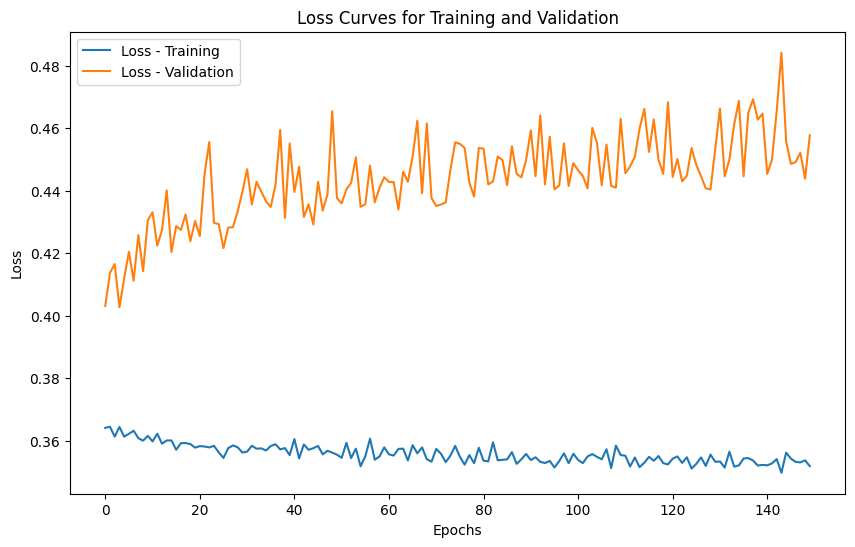

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Preparação dos dados
y_train = df_3["Survived"]
df_4 = df_3.drop(['Survived', 'Name', 'Ticket', 'Embarked'], axis=1)

X_train = df_4.values[0:891]
X_test = df_4.values[0:891]

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

test_size = 0.20
seed = 12

# Divisão em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
    test_size=test_size, random_state=seed)

# Inicializando o KFold para Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

# Definindo o modelo
modelo = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(2, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))
])

# Definindo a função de perda, otimizador e métricas
modelo.compile(loss='categorical_crossentropy',
               optimizer='rmsprop',
               metrics=['categorical_accuracy', 'Precision', 'Recall'])

# Convertendo os rótulos para formato categórico
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_val_categorical = tf.keras.utils.to_categorical(y_val, num_classes=2)

# Realizando Cross-Validation
for fold_idx, (train_index, val_index) in enumerate(kf.split(X_train)):
    # Dividindo os dados em treino e validação para cada dobra
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train_categorical[train_index], y_train_categorical[val_index]

    # Treinando o modelo na dobra
    historico = modelo.fit(X_train_fold, y_train_fold, epochs=150, batch_size=32, validation_data=(X_val_fold, y_val_fold), verbose=0)

    # Fazendo predições para a dobra de validação
    y_pred = modelo.predict(X_val_fold)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Gerando o classification report para a dobra
    report = classification_report(np.argmax(y_val_fold, axis=1), y_pred_classes)



    # Fixando e imprimindo o classification report da dobra 2
    if fold_idx == 1:  # Lembrando que o índice começa do 0
        print(f"Classification Report for Fold 2:\n{report}")
plt.figure(figsize=(10, 6))
plt.plot(historico.history['loss'], label='Loss - Training')
plt.plot(historico.history['val_loss'], label='Loss - Validation')
plt.title('Loss Curves for Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

No grafico mostra: uma curva de loss auta e ocilante na valiçao e uma curva baixa no treino. Portanto, exite overfitting significativo do nosso modelo, visto isso ajuste seram feitos.

#####Ajuste do Modelo


Training fold 1...
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Classification Report for Fold 1:
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       100
           1       0.88      0.56      0.68        79

    accuracy                           0.77       179
   macro avg       0.80      0.75      0.75       179
weighted avg       0.80      0.77      0.76       179


Training fold 2...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Classification Report for Fold 2:
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       119
           1       0.76      0.54      0.63        59

    accuracy                           0.79       178
   macro avg       0.78      0.73      0.74       178
weighted avg       0.79      0.79      0.78       178


Training fold 3...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Classification Report for Fold 3:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       113
           1       0.80      0.69      0.74        65

    accuracy                           0.83       178
   macro avg       0.82      0.80      0.81       178
weighted avg       0.82      0.83      0.82       178


Training fold 4...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Classification Report for Fold 4:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       111
           1       0.83      0.72      0.77        67

    accuracy                           0.84       178
   macro avg       0.83      0.81      0.82       178
weighted avg       0.84      0.84      0.83       178


Training fold 5...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Classification Report for Fold 5:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       106
           1       0.88      0.79      0.83        72

    accuracy                           0.87       178
   macro avg       0.87      0.86      0.86       178
weighted avg       0.87      0.87      0.87       178



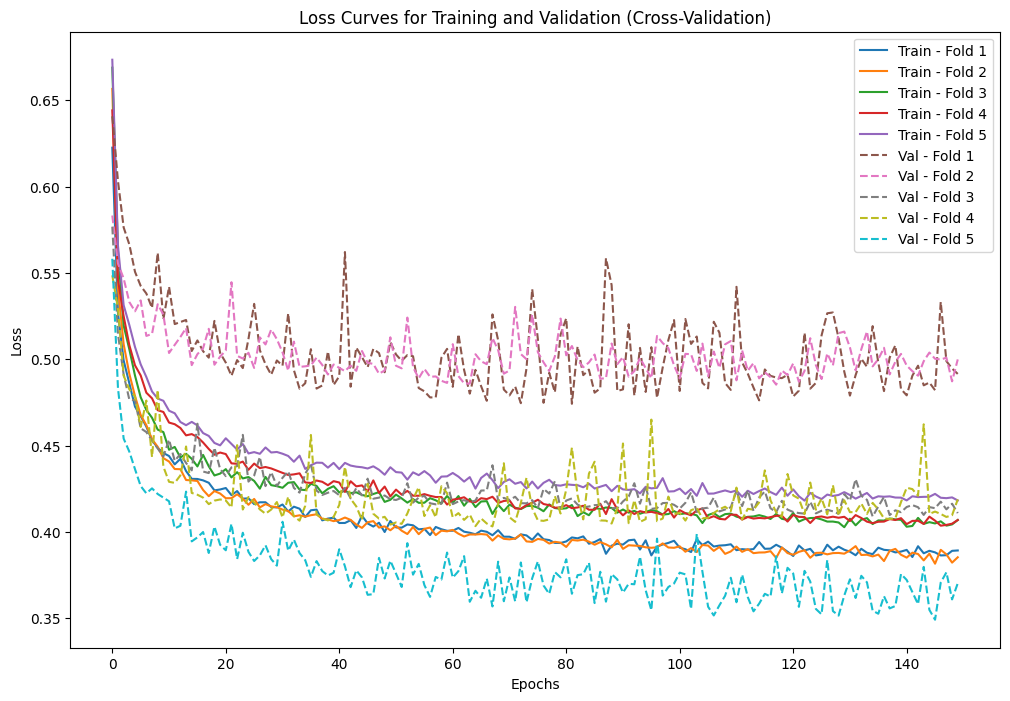

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Preparação dos dados
y_train = df_3["Survived"]
df_4 = df_3.drop(['Survived', 'Name', 'Ticket', 'Embarked'], axis=1)

X_train = df_4.values[0:891]
X_test = df_4.values[0:891]

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertendo os rótulos para formato categórico
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=2)

# Divisão em treino e validação com Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=12)

# Definindo o modelo
def create_model():
    modelo = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=[X_train.shape[1]]),
        tf.keras.layers.Dense(528, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        tf.keras.layers.Dense(264, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(2, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))
    ])
    modelo.compile(loss='categorical_crossentropy',
                   optimizer='rmsprop',
                   metrics=['categorical_accuracy', 'Precision', 'Recall'])
    return modelo

# Listas para armazenar as perdas
train_losses = []
val_losses = []

# Realizando Cross-Validation
for fold_idx, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"\nTraining fold {fold_idx + 1}...")

    # Dividindo os dados em treino e validação para cada dobra
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train_categorical[train_index], y_train_categorical[val_index]

    # Criando e treinando o modelo na dobra
    modelo = create_model()
    historico = modelo.fit(X_train_fold, y_train_fold, epochs=150, batch_size=32, validation_data=(X_val_fold, y_val_fold), verbose=0)

    # Armazenando as perdas
    train_losses.append(historico.history['loss'])
    val_losses.append(historico.history['val_loss'])

    # Fazendo predições para a dobra de validação
    y_pred = modelo.predict(X_val_fold)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Gerando o classification report para a dobra
    report = classification_report(np.argmax(y_val_fold, axis=1), y_pred_classes)

    # Imprimindo o classification report da dobra
    print(f"Classification Report for Fold {fold_idx + 1}:\n{report}")

# Plotando as perdas para todas as dobras
plt.figure(figsize=(12, 8))

# Plotando as curvas de perda de todas as dobras de treino
for i, loss in enumerate(train_losses):
    plt.plot(loss, label=f'Train - Fold {i+1}')

# Plotando as curvas de perda de todas as dobras de validação
for i, loss in enumerate(val_losses):
    plt.plot(loss, label=f'Val - Fold {i+1}', linestyle='--')

plt.title('Loss Curves for Training and Validation (Cross-Validation)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.title('Loss Curves for Training and Validation (Fold 5)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Training fold 1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Training fold 2...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Training fold 3...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Training fold 4...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Training fold 5...
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
Classification Report for Fold 5:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        82
           1       0.87      0.68      0.77        60

    accuracy                           0.82       142
   macro avg       0.84      0.81      0.81       142
weighted avg       0.83      0.82      0.82       142



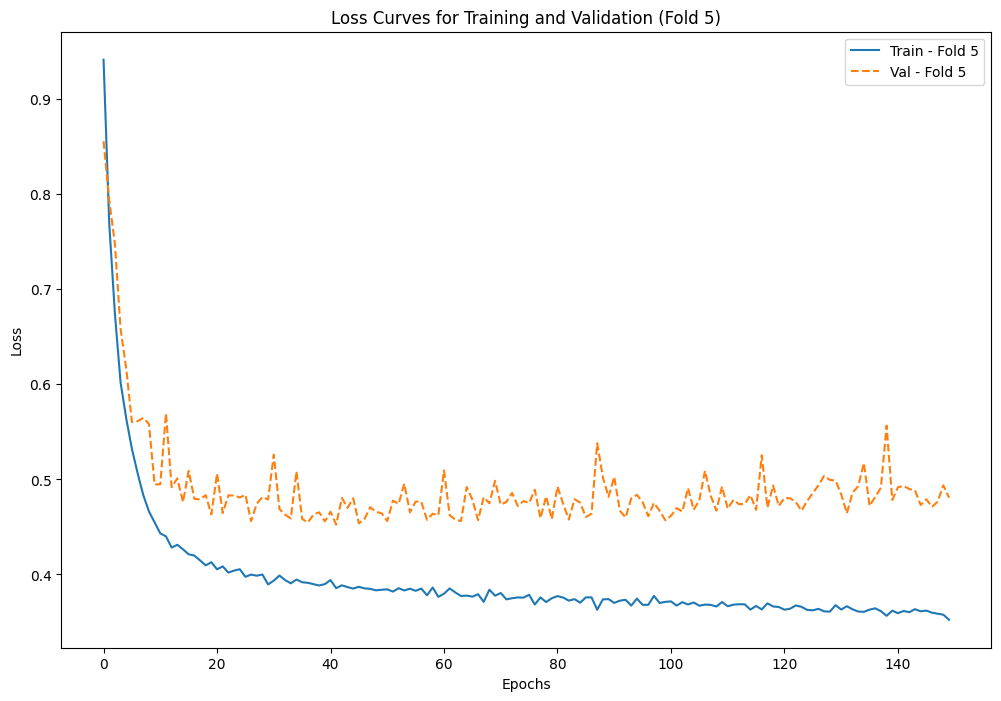

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Preparação dos dados
y = df_3["Survived"]
X = df_3.drop(['Survived', 'Name', 'Ticket', 'Embarked'], axis=1)


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

test_size = 0.20
seed = 12

# Divisão em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y,
    test_size=test_size, random_state=seed)

# Convertendo os rótulos para formato categórico
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_val_categorical = tf.keras.utils.to_categorical(y_val, num_classes=2)


# Inicializando o KFold para Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

# Definindo o modelo
def create_model():
    modelo = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=[X_train.shape[1]]),
        tf.keras.layers.Dense(528, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.000001)),
        tf.keras.layers.Dense(264, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(132, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(2, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))
    ])
    modelo.compile(loss='categorical_crossentropy',
                   optimizer='rmsprop',
                   metrics=['categorical_accuracy', 'Precision', 'Recall'])
    return modelo

# Listas para armazenar as perdas
train_losses = []
val_losses = []

# Realizando Cross-Validation
for fold_idx, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"\nTraining fold {fold_idx + 1}...")

    # Dividindo os dados em treino e validação para cada dobra
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train_categorical[train_index], y_train_categorical[val_index]

    # Criando e treinando o modelo na dobra
    modelo = create_model()
    historico = modelo.fit(X_train_fold, y_train_fold, epochs=150, batch_size=16, validation_data=(X_val_fold, y_val_fold), verbose=0)

    # Armazenando as perdas
    train_losses.append(historico.history['loss'])
    val_losses.append(historico.history['val_loss'])

    # Fazendo predições para a dobra 5
    if fold_idx == 4:  # Dobra 5 (index 4)
        y_pred = modelo.predict(X_val_fold)
        y_pred_classes = np.argmax(y_pred, axis=1)

        # Gerando o classification report para a dobra 5
        report = classification_report(np.argmax(y_val_fold, axis=1), y_pred_classes)
        print(f"Classification Report for Fold 5:\n{report}")

# Plotando as perdas apenas para a dobra 5
plt.figure(figsize=(12, 8))

# Plotando a curva de perda de treinamento para a dobra 5
plt.plot(train_losses[4], label='Train - Fold 5')

# Plotando a curva de perda de validação para a dobra 5
plt.plot(val_losses[4], label='Val - Fold 5', linestyle='--')

plt.title('Loss Curves for Training and Validation (Fold 5)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Training fold 1...

Training fold 2...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Training fold 3...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Training fold 4...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Training fold 5...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Classification Report for Fold 5:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        82
           1       0.88      0.72      0.79        60

    accuracy                           0.84       142
   macro avg       0.85      0.82      0.83       142
weighted avg       0.84      0.84      0.83       142



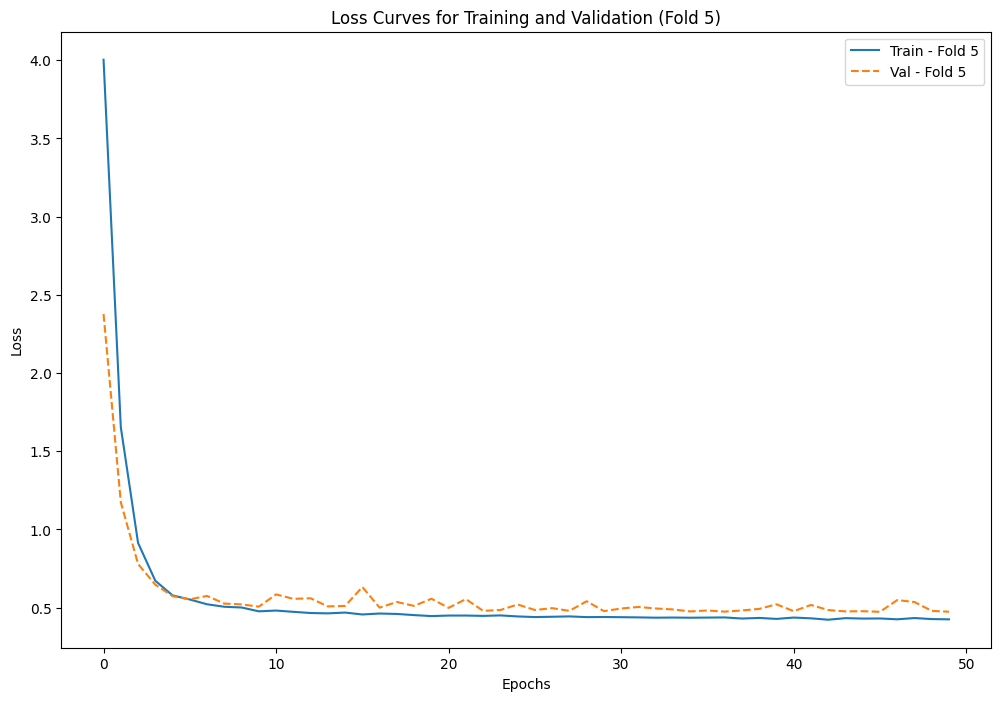

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Preparação dos dados
y = df_3["Survived"]
X = df_3.drop(['Survived', 'Name', 'Ticket', 'Embarked'], axis=1)


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

test_size = 0.20
seed = 12

# Divisão em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y,
    test_size=test_size, random_state=seed)

# Convertendo os rótulos para formato categórico
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_val_categorical = tf.keras.utils.to_categorical(y_val, num_classes=2)


# Inicializando o KFold para Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

# Definindo o modelo
def create_model():
    modelo = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=[X_train.shape[1]]),
        tf.keras.layers.Dense(528, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        tf.keras.layers.Dense(264, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(132, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(66, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),

        tf.keras.layers.Dense(2, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))
    ])
    modelo.compile(loss='categorical_crossentropy',
                   optimizer='rmsprop',
                   metrics=['categorical_accuracy', 'Precision', 'Recall'])
    return modelo

# Listas para armazenar as perdas
train_losses = []
val_losses = []

# Realizando Cross-Validation
for fold_idx, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"\nTraining fold {fold_idx + 1}...")

    # Dividindo os dados em treino e validação para cada dobra
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train_categorical[train_index], y_train_categorical[val_index]

    # Criando e treinando o modelo na dobra
    modelo = create_model()
    historico = modelo.fit(X_train_fold, y_train_fold, epochs=50, batch_size=16, validation_data=(X_val_fold, y_val_fold), verbose=0)

    # Armazenando as perdas
    train_losses.append(historico.history['loss'])
    val_losses.append(historico.history['val_loss'])

    # Fazendo predições para a dobra 5
    if fold_idx == 4:  # Dobra 5 (index 4)
        y_pred = modelo.predict(X_val_fold)
        y_pred_classes = np.argmax(y_pred, axis=1)

        # Gerando o classification report para a dobra 5
        report = classification_report(np.argmax(y_val_fold, axis=1), y_pred_classes)
        print(f"Classification Report for Fold 5:\n{report}")

# Plotando as perdas apenas para a dobra 5
plt.figure(figsize=(12, 8))

# Plotando a curva de perda de treinamento para a dobra 5
plt.plot(train_losses[4], label='Train - Fold 5')

# Plotando a curva de perda de validação para a dobra 5
plt.plot(val_losses[4], label='Val - Fold 5', linestyle='--')

plt.title('Loss Curves for Training and Validation (Fold 5)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Training fold 1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Training fold 2...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Training fold 3...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Training fold 4...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Training fold 5...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Classification Report for Fold 5:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        82
           1       0.90      0.73      0.81        60

    accuracy                           0.85       142
   macro avg       0.86      0.84      0.84       142
weighted avg       0.86      0.85      0.85       142



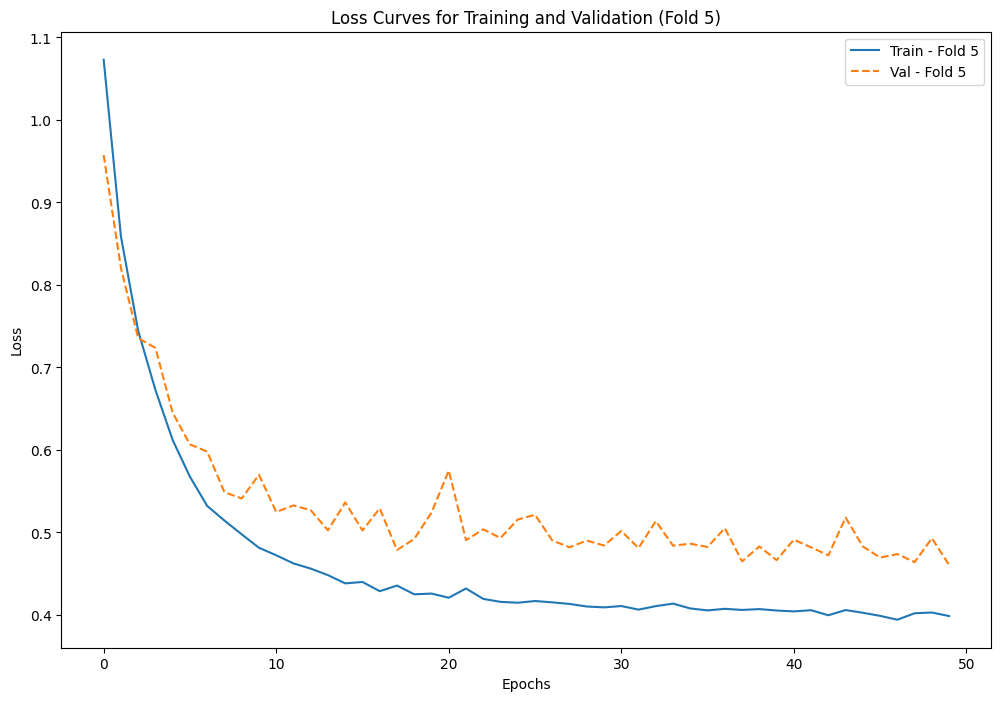

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Preparação dos dados
y = df_3["Survived"]
X = df_3.drop(['Survived', 'Name', 'Ticket', 'Embarked'], axis=1)


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

test_size = 0.20
seed = 12

# Divisão em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y,
    test_size=test_size, random_state=seed)

# Convertendo os rótulos para formato categórico
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_val_categorical = tf.keras.utils.to_categorical(y_val, num_classes=2)


# Inicializando o KFold para Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

# Definindo o modelo
def create_model():
    modelo = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=[X_train.shape[1]]),
        tf.keras.layers.Dense(528, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.000001)),
        tf.keras.layers.Dense(264, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(132, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(66, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),


        tf.keras.layers.Dense(2, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01))
    ])
    modelo.compile(loss='categorical_crossentropy',
                   optimizer='rmsprop',
                   metrics=['categorical_accuracy', 'Precision', 'Recall'])
    return modelo

# Listas para armazenar as perdas
train_losses = []
val_losses = []

# Realizando Cross-Validation
for fold_idx, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"\nTraining fold {fold_idx + 1}...")

    # Dividindo os dados em treino e validação para cada dobra
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train_categorical[train_index], y_train_categorical[val_index]

    # Criando e treinando o modelo na dobra
    modelo = create_model()
    historico = modelo.fit(X_train_fold, y_train_fold, epochs=50, batch_size=16, validation_data=(X_val_fold, y_val_fold), verbose=0)

    # Armazenando as perdas
    train_losses.append(historico.history['loss'])
    val_losses.append(historico.history['val_loss'])

    # Fazendo predições para a dobra 5
    if fold_idx == 4:  # Dobra 5 (index 4)
        y_pred = modelo.predict(X_val_fold)
        y_pred_classes = np.argmax(y_pred, axis=1)

        # Gerando o classification report para a dobra 5
        report = classification_report(np.argmax(y_val_fold, axis=1), y_pred_classes)
        print(f"Classification Report for Fold 5:\n{report}")

# Plotando as perdas apenas para a dobra 5
plt.figure(figsize=(12, 8))

# Plotando a curva de perda de treinamento para a dobra 5
plt.plot(train_losses[4], label='Train - Fold 5')

# Plotando a curva de perda de validação para a dobra 5
plt.plot(val_losses[4], label='Val - Fold 5', linestyle='--')

plt.title('Loss Curves for Training and Validation (Fold 5)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

com o aumento de neuronis  e novo KFold, o loss da validaçao teve uma queda consideravel, reduzindo o overfitting de forma significativa.

# Analise de Erros

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


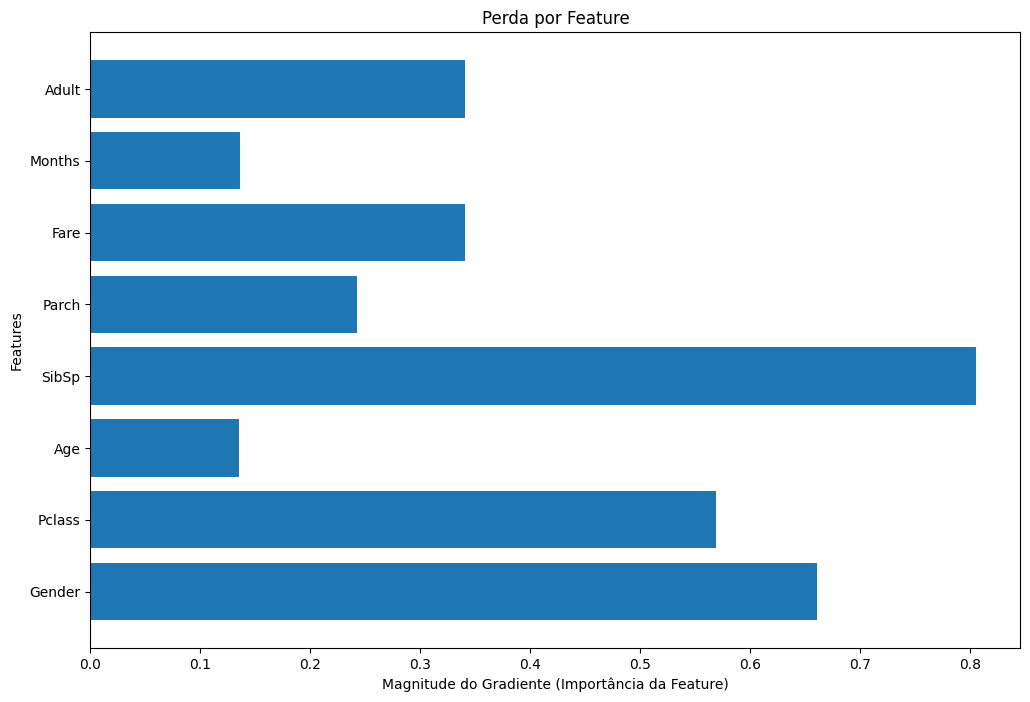

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Divisão dos dados já preparada
# Assuming X_scaled and y are already defined from previous cells
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=test_size, random_state=seed)

# Convertendo os rótulos para formato categórico
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_val_categorical = tf.keras.utils.to_categorical(y_val, num_classes=2)


# Função para calcular a perda por feature
def calculate_loss_by_feature(model, X_val, y_val):
    # Convert X_val to a TensorFlow Tensor
    X_val_tensor = tf.convert_to_tensor(X_val, dtype=tf.float32)

    with tf.GradientTape() as tape:
        # Habilitando o rastreamento do gradiente nas entradas
        tape.watch(X_val_tensor)

        # Prevendo as saídas
        y_pred = model(X_val_tensor)

        # Calculando a perda
        loss = tf.keras.losses.categorical_crossentropy(y_val, y_pred)

    # Calculando o gradiente da perda com relação às entradas
    gradients = tape.gradient(loss, X_val_tensor)

    # Calculando a magnitude dos gradientes para cada feature
    feature_importance = np.mean(np.abs(gradients.numpy()), axis=0)

    return feature_importance

# Assuming create_model is defined in a previous cell
# Creating and training the model
modelo = create_model()
modelo.fit(X_train, y_train_categorical, epochs=50, batch_size=16, validation_data=(X_val, y_val_categorical), verbose=0)

# Calculando a perda por feature
feature_importance = calculate_loss_by_feature(modelo, X_val, y_val_categorical)

# Visualizando a perda por feature
plt.figure(figsize=(12, 8))
plt.barh(X.columns, feature_importance)
plt.title('Perda por Feature')
plt.xlabel('Magnitude do Gradiente (Importância da Feature)')
plt.ylabel('Features')
plt.show()

###### Segunda EDA

- Uma segunda EDA com objetivo de entender a correlação entre as três features, mais relevantes na loss da validaçao do modelo, com a variavel alvo.

- features: SibSp, Pclass, Gender.

<Figure size 800x600 with 0 Axes>

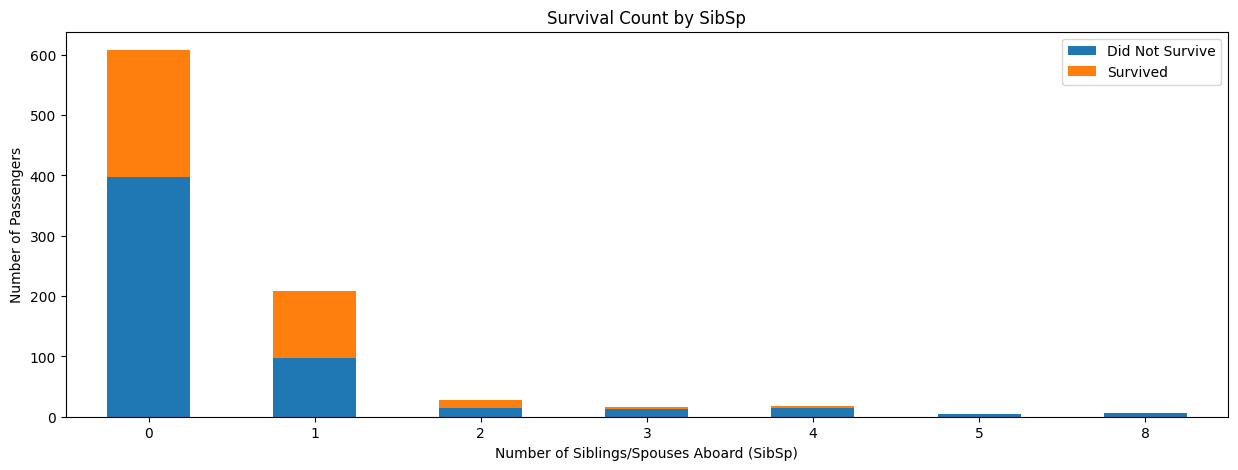

In [ ]:
plt.figure(figsize=(8, 6))
df_3.groupby('SibSp')['Survived'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Survival Count by SibSp')
plt.xlabel('Number of Siblings/Spouses Aboard (SibSp)')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

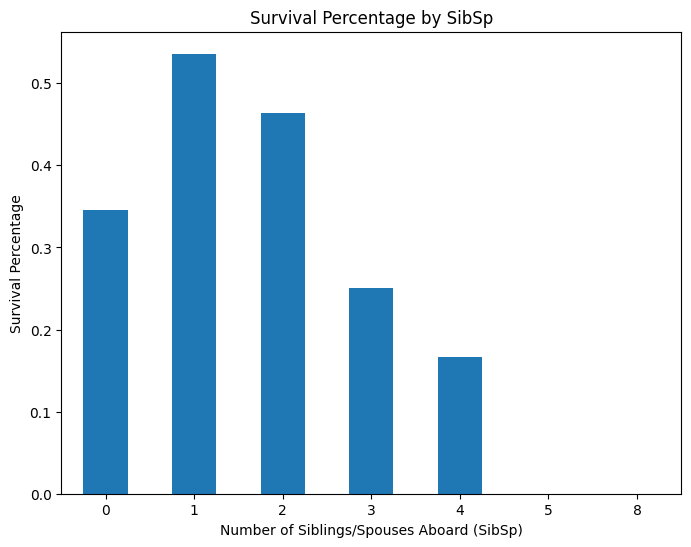

In [ ]:
survival_rate_by_sibsp = df_3.groupby('SibSp')['Survived'].value_counts(normalize=True).unstack()

plt.figure(figsize=(8, 6))
survival_rate_by_sibsp[1].plot(kind='bar') # Plotting the percentage of Survived (1)
plt.title('Survival Percentage by SibSp')
plt.xlabel('Number of Siblings/Spouses Aboard (SibSp)')
plt.ylabel('Survival Percentage')
plt.xticks(rotation=0)
plt.show()

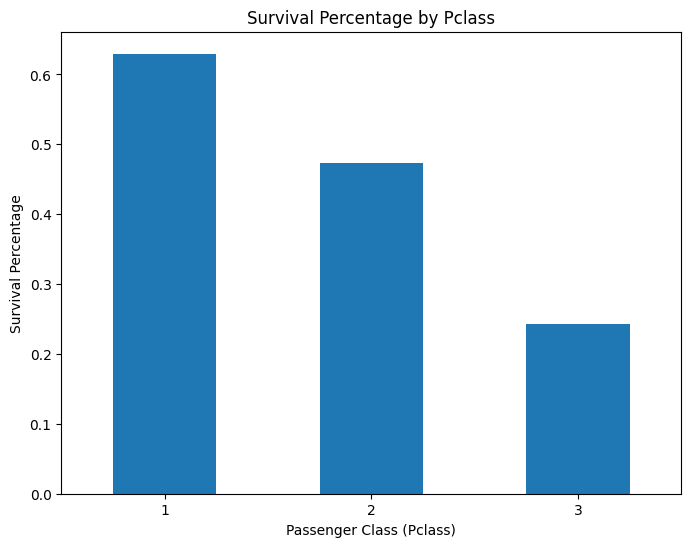

In [ ]:
survival_rate_by_pclass = df_3.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack()

plt.figure(figsize=(8, 6))
survival_rate_by_pclass[1].plot(kind='bar') # Plotting the percentage of Survived (1)
plt.title('Survival Percentage by Pclass')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Survival Percentage')
plt.xticks(rotation=0)
plt.show()

<Figure size 800x600 with 0 Axes>

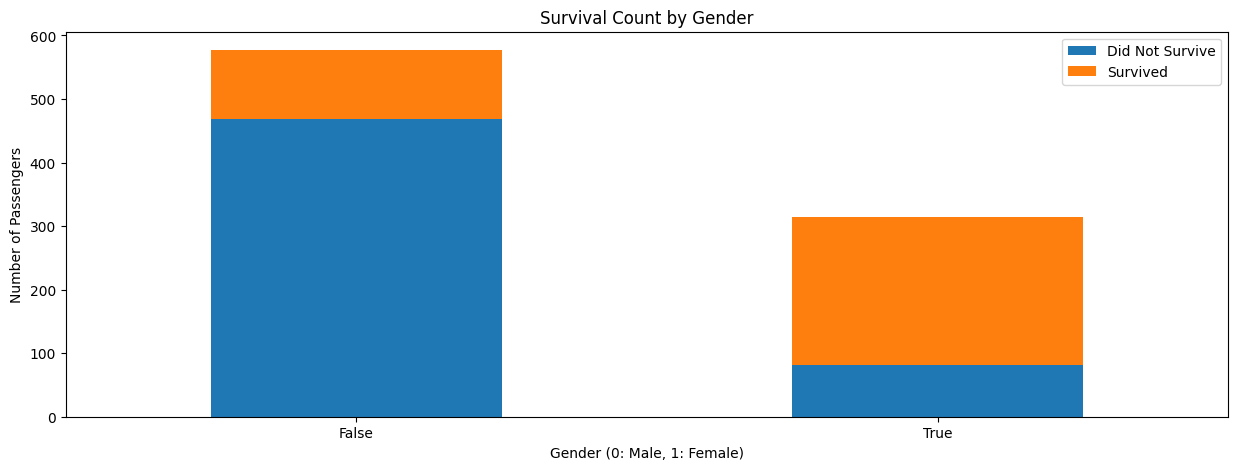

In [ ]:
plt.figure(figsize=(8, 6))
df_3.groupby('Gender')['Survived'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Survival Count by Gender')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(['Did Not Survive', 'Survived'])
plt.show()



Training fold 1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Training fold 2...

Training fold 3...

Training fold 4...

Training fold 5...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Classification Report for Fold 5:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        82
           1       0.80      0.80      0.80        60

    accuracy                           0.83       142
   macro avg       0.83      0.83      0.83       142
weighted avg       0.83      0.83      0.83       142



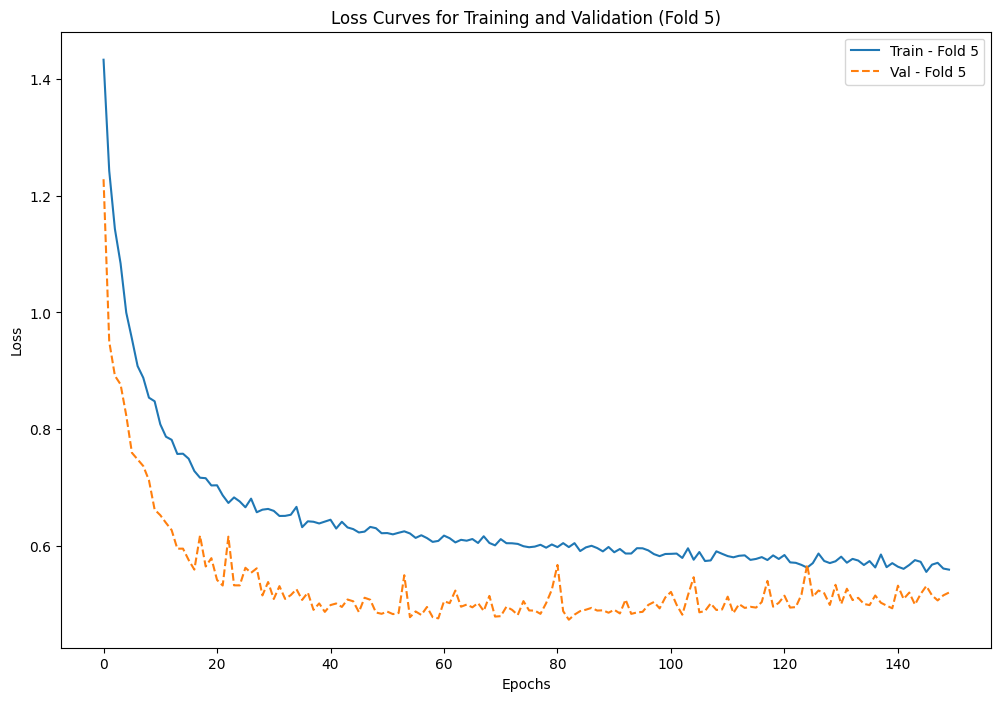

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Preparação dos dados
y = df_3["Survived"]
X = df_3.drop(['Survived', 'Name', 'Ticket', 'Embarked'], axis=1)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

test_size = 0.20
seed = 12

# Divisão em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=test_size, random_state=seed)

# Convertendo os rótulos para formato categórico
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_val_categorical = tf.keras.utils.to_categorical(y_val, num_classes=2)

# Inicializando o KFold para Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

# Função para gerar pesos de amostras com base nas features
def generate_sample_weights(X_train):
    sample_weights = np.ones(X_train.shape[0])

    # Aplicando maior peso para características específicas
    for idx, feature in enumerate(['SibSp', 'Pclass', 'Gender']):
        if feature == 'Gender':
            # Considera 'Gender' (por exemplo, 0 para feminino, 1 para masculino)
            gender_idx = X_train[:, idx] == 2  # Masc.
            sample_weights[gender_idx] *= 1  # para 'Male'
        elif feature == 'Pclass':
            # Considera Pclass, com maior peso para Pclass 1
            class_1_idx = X_train[:, idx] == 1
            sample_weights[class_1_idx] *= 1  # Aumentando o peso para 'Pclass 1'
            class_2_idx = X_train[:, idx] == 1
            sample_weights[class_2_idx] *= 1  # Aumentando o peso para 'Pclass 2'
            class_3_idx = X_train[:, idx] == 1
            sample_weights[class_3_idx] *= 2  # Aumentando o peso para 'Pclass 3'
        elif feature == 'SibSp':
            # Atribui peso maior para pessoas com mais irmãos/cônjuges
            large_sibsp = X_train[:, idx] > 1.0  # Mais de 3 SibSp
            sample_weights[large_sibsp] *= 2 # Aumentando o peso para SibSp > 3

    return sample_weights

# Função para criar o modelo MLP
def create_model():
    modelo = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=[X_train.shape[1]]),
        tf.keras.layers.Dense(528, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.00001)),
        tf.keras.layers.Dense(264, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(132, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(66, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(2, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01))

    ])

    modelo.compile(loss='categorical_crossentropy',
                   optimizer='rmsprop',
                   metrics=['categorical_accuracy', 'Precision', 'Recall'])
    return modelo

# Lista para armazenar exemplos e perdas de validação
validation_examples = []
validation_losses = []

# Realizando Cross-Validation
for fold_idx, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"\nTraining fold {fold_idx + 1}...")

    # Dividindo os dados em treino e validação para cada dobra
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train_categorical[train_index], y_train_categorical[val_index]

    # Gerando o sample_weight para cada dobra de treino
    sample_weights = generate_sample_weights(X_train_fold)

    # Criando e treinando o modelo na dobra
    modelo = create_model()
    historico = modelo.fit(X_train_fold, y_train_fold, epochs=150, batch_size=32, validation_data=(X_val_fold, y_val_fold), verbose=0, sample_weight=sample_weights)

    # Armazenando exemplos e perdas para validação
    val_loss_per_epoch = historico.history['val_loss']
    val_examples_fold = X_val_fold  # Get validation examples for the current fold
    for epoch_loss in val_loss_per_epoch:
        pass

    # Fazendo predições para a dobra 5
    if fold_idx == 4:  # Dobra 5 (index 4)
        y_pred = modelo.predict(X_val_fold)
        y_pred_classes = np.argmax(y_pred, axis=1)0

        # Gerando o classification report para a dobra 5
        report = classification_report(np.argmax(y_val_fold, axis=1), y_pred_classes)
        print(f"Classification Report for Fold 5:\n{report}")

# Plotting the loss curves for the last trained fold (Fold 5 in this case)
plt.figure(figsize=(12, 8))

# Plotting the curve of training loss for the last fold
plt.plot(historico.history['loss'], label='Train - Fold 5')

# Plotting the curve of validation loss for the last fold
plt.plot(historico.history['val_loss'], label='Val - Fold 5', linestyle='--')

plt.title('Loss Curves for Training and Validation (Fold 5)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




ANTES DA ANALISE DE ERROS POR FEATURES :

                  precision    recall  f1-score   support

               0       0.83      0.94      0.88        82
               1       0.90      0.73      0.81        60

    accuracy                               0.85       142
    macro avg          0.86      0.84      0.84       142
    weighted avg       0.86      0.85      0.85       142




A interpretação dessas métricas mostra que o modelo está se comportando de maneira diferente para as duas classes. Para a classe 0, o recall é de 0.94, o que significa que o modelo consegue identificar corretamente 94% dos exemplos que realmente pertencem a essa classe. Isso indica que ele está deixando passar pouquíssimos exemplos da classe 0, ou seja, quase não há falsos negativos. A precisão para essa classe é de 0.83, o que quer dizer que, sempre que o modelo prevê um exemplo como sendo da classe 0, ele está certo em 83% das vezes. O f1-score, que é a média harmônica entre precisão e recall, está em 0.88, indicando um ótimo equilíbrio entre os dois aspectos para essa classe.

Por outro lado, a classe 1 apresenta uma precisão de 0.90, o que mostra que quando o modelo decide que um exemplo é da classe 1, ele está certo na grande maioria das vezes. No entanto, o recall cai para 0.73, o que significa que ele só consegue identificar corretamente 73% dos exemplos realmente pertencentes à classe 1. Isso quer dizer que 27% dos exemplos da classe 1 estão sendo classificados incorretamente como classe 0, ou seja, há um número significativo de falsos negativos. O f1-score para essa classe é de 0.81, um valor ainda bom, mas consideravelmente inferior ao da classe 0.

Esses resultados indicam que o modelo está se mostrando mais conservador ao fazer previsões da classe 1. Ele prefere errar por omissão — ou seja, deixar de prever a classe 1 — do que errar por inclusão, o que é comum em classificadores com alta precisão e baixo recall. Isso pode se tornar problemático dependendo da natureza da classe 1. Se ela representar situações críticas como fraudes, doenças ou falhas, o impacto de deixar esses casos passarem despercebidos pode ser muito alto. Portanto, dependendo do contexto, seria recomendável ajustar o modelo para aumentar o recall da classe 1, mesmo que isso custe um pouco da precisão. Isso pode ser feito por meio de técnicas como ajuste do limiar de decisão, uso de métodos de balanceamento de classe, ou mudanças na penalização de erros no processo de treinamento.


DEPOIS DA ANALISSE DE ERROS :  
               
                   precision    recall  f1-score   support

               0       0.85      0.85      0.85        82
               1       0.80      0.80      0.80        60

    accuracy                               0.83       142
    macro avg          0.83      0.83      0.83       142
    weighted avg       0.83      0.83      0.83       142



Após a aplicação de sample_weight para atribuir pesos diferenciados aos erros com base em determinadas features por classe, observa-se que as métricas de validação mantiveram-se bem equilibradas entre as classes. A classe 0 apresenta precisão, recall e f1-score iguais a 0.85, o que indica que o modelo conseguiu identificar essa classe com uma boa taxa de acerto, tanto em termos de identificação correta dos casos (recall), quanto de acerto entre as previsões positivas feitas (precisão). O f1-score reforça esse equilíbrio e mostra que a qualidade geral da previsão da classe 0 é sólida.

No caso da classe 1, a precisão, recall e f1-score ficaram em 0.80. Isso demonstra que, mesmo com a introdução de pesos através do uso de sample_weight, o modelo conseguiu manter uma performance bastante consistente também para essa classe. Embora o desempenho da classe 1 esteja um pouco abaixo da classe 0, a diferença é pequena, o que indica que os pesos atribuídos foram eficazes em tornar o modelo mais sensível aos erros dessa classe, sem causar um desequilíbrio exagerado nas métricas.

De forma geral, o uso de sample_weight parece ter contribuído positivamente para ajustar a atenção do modelo aos erros em features específicas, equilibrando a qualidade das previsões entre as duas classes. Isso sugere que os pesos foram bem calibrados e que o modelo passou a considerar de maneira mais estratégica as instâncias que antes poderiam ter maior impacto nos erros de previsão, sem comprometer a performance global. O resultado é um classificador mais robusto e justo entre as classes, especialmente útil em contextos onde ambas têm importância crítica.


